In [1]:
import pandas as pd

In [2]:
pd.read_csv("music.csv")

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [3]:
df=pd.read_csv("music.csv")

In [4]:
df.shape

(18, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     18 non-null     int64 
 1   gender  18 non-null     int64 
 2   genre   18 non-null     object
dtypes: int64(2), object(1)
memory usage: 564.0+ bytes


In [7]:
feature=df.drop(columns=['genre'])

In [8]:
feature

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1
5,30,1
6,31,1
7,33,1
8,37,1
9,20,0


In [9]:
Target=df['genre']

In [10]:
Target

0        HipHop
1        HipHop
2        HipHop
3          Jazz
4          Jazz
5          Jazz
6     Classical
7     Classical
8     Classical
9         Dance
10        Dance
11        Dance
12     Acoustic
13     Acoustic
14     Acoustic
15    Classical
16    Classical
17    Classical
Name: genre, dtype: object

In [11]:
from  sklearn.tree import DecisionTreeClassifier,export_text,plot_tree

In [14]:
model=DecisionTreeClassifier()
model.fit(feature,Target)

DecisionTreeClassifier()

In [15]:
df

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [18]:
model.predict([[35,0],[37,1]]) #this is to predict

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Classical', 'Classical'], dtype=object)

In [19]:
from sklearn.model_selection import train_test_split

In [22]:
#calcullating the accurracy of data
train_test_split(feature,Target,test_size=0.2)

[    age  gender
 11   25       0
 6    31       1
 3    26       1
 12   26       0
 5    30       1
 9    20       0
 10   21       0
 4    29       1
 2    25       1
 0    20       1
 14   30       0
 7    33       1
 1    23       1
 8    37       1,
     age  gender
 13   27       0
 17   35       0
 15   31       0
 16   34       0,
 11        Dance
 6     Classical
 3          Jazz
 12     Acoustic
 5          Jazz
 9         Dance
 10        Dance
 4          Jazz
 2        HipHop
 0        HipHop
 14     Acoustic
 7     Classical
 1        HipHop
 8     Classical
 Name: genre, dtype: object,
 13     Acoustic
 17    Classical
 15    Classical
 16    Classical
 Name: genre, dtype: object]

In [23]:
feature_train,feature_test,target_train,target_test=train_test_split(feature,Target,test_size=0.2)

In [24]:
feature_train,feature_test,target_train,target_test

(    age  gender
 12   26       0
 5    30       1
 11   25       0
 15   31       0
 14   30       0
 3    26       1
 8    37       1
 7    33       1
 16   34       0
 17   35       0
 9    20       0
 4    29       1
 10   21       0
 6    31       1,
     age  gender
 13   27       0
 0    20       1
 2    25       1
 1    23       1,
 12     Acoustic
 5          Jazz
 11        Dance
 15    Classical
 14     Acoustic
 3          Jazz
 8     Classical
 7     Classical
 16    Classical
 17    Classical
 9         Dance
 4          Jazz
 10        Dance
 6     Classical
 Name: genre, dtype: object,
 13    Acoustic
 0       HipHop
 2       HipHop
 1       HipHop
 Name: genre, dtype: object)

In [31]:
model.fit(feature_train,target_train) #to train the data using another metthod
prediction=model.predict(feature_test)

In [32]:
from sklearn.metrics import accuracy_score #to check acuracy of the data

In [33]:
score=accuracy_score(target_test,prediction)

In [34]:
score

0.25

In [35]:
pip install joblib# so we don't keep refreshing the model

Note: you may need to restart the kernel to use updated packages.


In [36]:
import joblib

In [37]:
joblib.dump(model,'music-recommender.joblib') #dump is used for saving on your file

['music-recommender.joblib']

In [41]:
model=joblib.load('music-recommender.joblib')
prediction=model.predict([[40,1]])
prediction


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Classical'], dtype=object)

In [39]:
model

DecisionTreeClassifier()

In [40]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

[Text(0.6666666666666666, 0.875, 'age <= 30.5\ngini = 0.704\nsamples = 14\nvalue = [2, 6, 3, 3]\nclass = Classical'),
 Text(0.5, 0.625, 'gender <= 0.5\ngini = 0.656\nsamples = 8\nvalue = [2, 0, 3, 3]\nclass = Dance'),
 Text(0.3333333333333333, 0.375, 'age <= 25.5\ngini = 0.48\nsamples = 5\nvalue = [2, 0, 3, 0]\nclass = Dance'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0]\nclass = Dance'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0]\nclass = Acoustic'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 3]\nclass = HipHop'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0, 0]\nclass = Classical')]

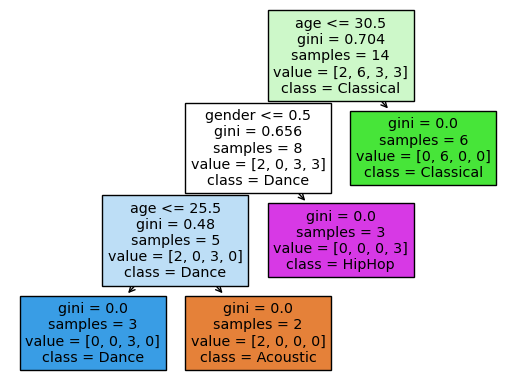

In [42]:
tree.plot_tree(model,feature_names=['age','gender'], # this is uses diagram to explain model used both train and test
               class_names= sorted(Target.unique()),
               filled=True)